In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from highlight_text import ax_text, fig_text
import seaborn as sns

### About Dataset

A team led by public policy professor Omar Asensio used a field experiment to collect data on 3,395 electric vehicle charging sessions between November 2014 and October 2015. The dataset “contains sessions from 85 EV drivers with repeat usage at 105 stations across 25 sites at a workplace charging program”; it indicates the date and length of each session, total energy used, cost, and more.

Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NFPQLW

### The Aim of the Analysis

The main objective is to carry out exploratory data analysis that will help to answers questions:

1. What patterns emerge in the energy consumption of electric vehicles per charging session?
2. How long does it typically take to charge an electric vehicle?
3. On which days of the week do electric vehicles undergo the most charging sessions?
4. What is the average charging duration of electric vehicles broken down by day of the week?
5. What is the relationship between energy consumption and charging time for electric vehicles?
6. How does the charging cost of electric vehicles correlate with their charging time?
7. What is the average cost per unit of charging electric vehicles on each day of the week?
8. Which charging facilities are the most popular among electric vehicle users?
9. What is the average cost per unit of charging at different charging facilities?

### Import data

In [2]:
df = pd.read_csv("station_data_dataverse.csv")

In [3]:
df.head(5)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


### Check number of cells

In [4]:
df.size

81480

### Check number of rows

In [5]:
len(df)

3395

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [7]:
df.dtypes

sessionId           int64
kwhTotal          float64
dollars           float64
created            object
ended              object
startTime           int64
endTime             int64
chargeTimeHrs     float64
weekday            object
platform           object
distance          float64
userId              int64
stationId           int64
locationId          int64
managerVehicle      int64
facilityType        int64
Mon                 int64
Tues                int64
Wed                 int64
Thurs               int64
Fri                 int64
Sat                 int64
Sun                 int64
reportedZip         int64
dtype: object

### Check null values

In [8]:
df.isnull().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64

### Show records with null values

In [9]:
df.loc[df.isnull().any(axis=1)]

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1865681,0.00,0.00,0015-09-25 19:10:00,0015-09-25 19:11:08,19,19,0.018889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3209,7155296,0.00,0.00,0015-10-02 19:16:23,0015-10-02 19:18:07,19,19,0.028889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3210,7688636,0.00,0.00,0015-10-02 19:18:45,0015-10-02 19:20:08,19,19,0.023056,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3282,5181950,0.00,0.00,0015-09-23 11:02:55,0015-09-23 13:03:05,11,13,2.002778,Wed,ios,...,1,2,0,0,1,0,0,0,0,1


### Check duplicated values

In [10]:
df.duplicated().sum()

0

In [11]:
df.loc[:,['kwhTotal','dollars','startTime','endTime','chargeTimeHrs','distance']].describe()

,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378
std,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571
min,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871
50%,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826
75%,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053
max,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292


### Using Boxplots to detect outliers

In [12]:
df_numeric_cols = df.loc[:,["kwhTotal","dollars","chargeTimeHrs","distance"]]

C:\Users\Paweł\AppData\Local\Temp\ipykernel_9920\2241748097.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


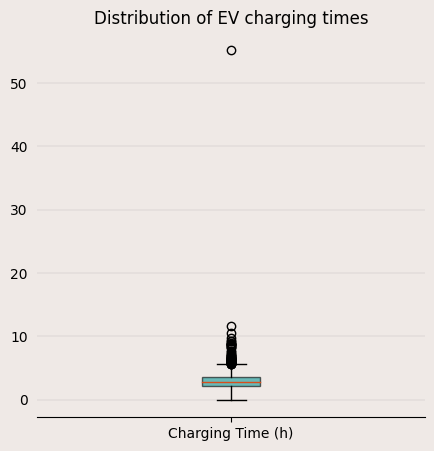

In [128]:
fig, ax = plt.subplots(figsize=(5,5),facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25,
        alpha=0.5)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Charging Time (h)"
ax.set_xticklabels(labels)

colors = ['#109A99', '#D94D1A']
box_color = dict(color=colors[0])
median_color = dict(color=colors[1])

bp0 = ax.boxplot(df_numeric_cols["chargeTimeHrs"],patch_artist = True,
           boxprops = dict(facecolor = "#109A99"),medianprops=median_color
           )
for b in bp0['boxes']:
    b.set_alpha(0.6)

ax.set_title("Distribution of EV charging times")
plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_9920\2375421366.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


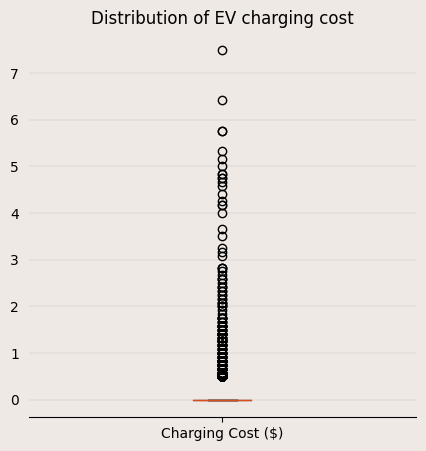

In [129]:
fig, ax = plt.subplots(figsize=(5,5),facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25,
        alpha=0.5)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Charging Cost ($)"
ax.set_xticklabels(labels)

colors = ['#109A99', '#D94D1A']
box_color = dict(color=colors[0])
median_color = dict(color=colors[1])

bp0 = ax.boxplot(df_numeric_cols["dollars"],patch_artist = True,
           boxprops = dict(facecolor = "#109A99"),medianprops=median_color
           )

for b in bp0['boxes']:
    b.set_alpha(0.6)

ax.set_title("Distribution of EV charging cost")
plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_9920\3645166076.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


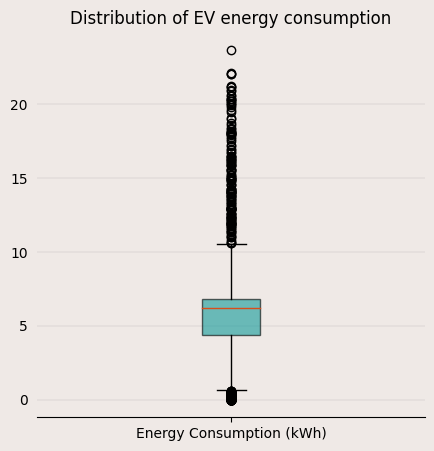

In [130]:
#box_plot(df_numeric_cols["kwhTotal"])
fig, ax = plt.subplots(figsize=(5,5),facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25,
        alpha=0.5)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Energy Consumption (kWh)"
ax.set_xticklabels(labels)

colors = ['#109A99', '#D94D1A']
box_color = dict(color=colors[0])
median_color = dict(color=colors[1])

bp0 = ax.boxplot(df_numeric_cols["kwhTotal"],patch_artist = True,
           boxprops = dict(facecolor = "#109A99"),medianprops=median_color
           )

for b in bp0['boxes']:
    b.set_alpha(0.6)

ax.set_title("Distribution of EV energy consumption")
plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_9920\3665203765.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


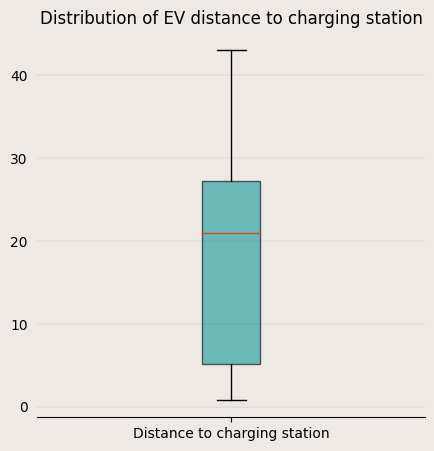

In [131]:
s_distance = df_numeric_cols.distance.dropna()

fig, ax = plt.subplots(figsize=(5,5),facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25,
        alpha=0.5)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Distance to charging station"
ax.set_xticklabels(labels)

colors = ['#109A99', '#D94D1A']
box_color = dict(color=colors[0])
median_color = dict(color=colors[1])

bp0 = ax.boxplot(s_distance,patch_artist = True,
           boxprops = dict(facecolor = "#109A99"),medianprops=median_color
           )

for b in bp0['boxes']:
    b.set_alpha(0.6)

ax.set_title("Distribution of EV distance to charging station")
plt.show()

In [18]:
# The distribution of EV charging times reveals that the maximum value is significantly distant from the rest of the values, prompting its exclusion from the dataset.
max_charge_time = df["chargeTimeHrs"].max()
df = df.loc[df["chargeTimeHrs"] < max_charge_time]

### Energy Consumption of Electric Vehicles per Charging Session

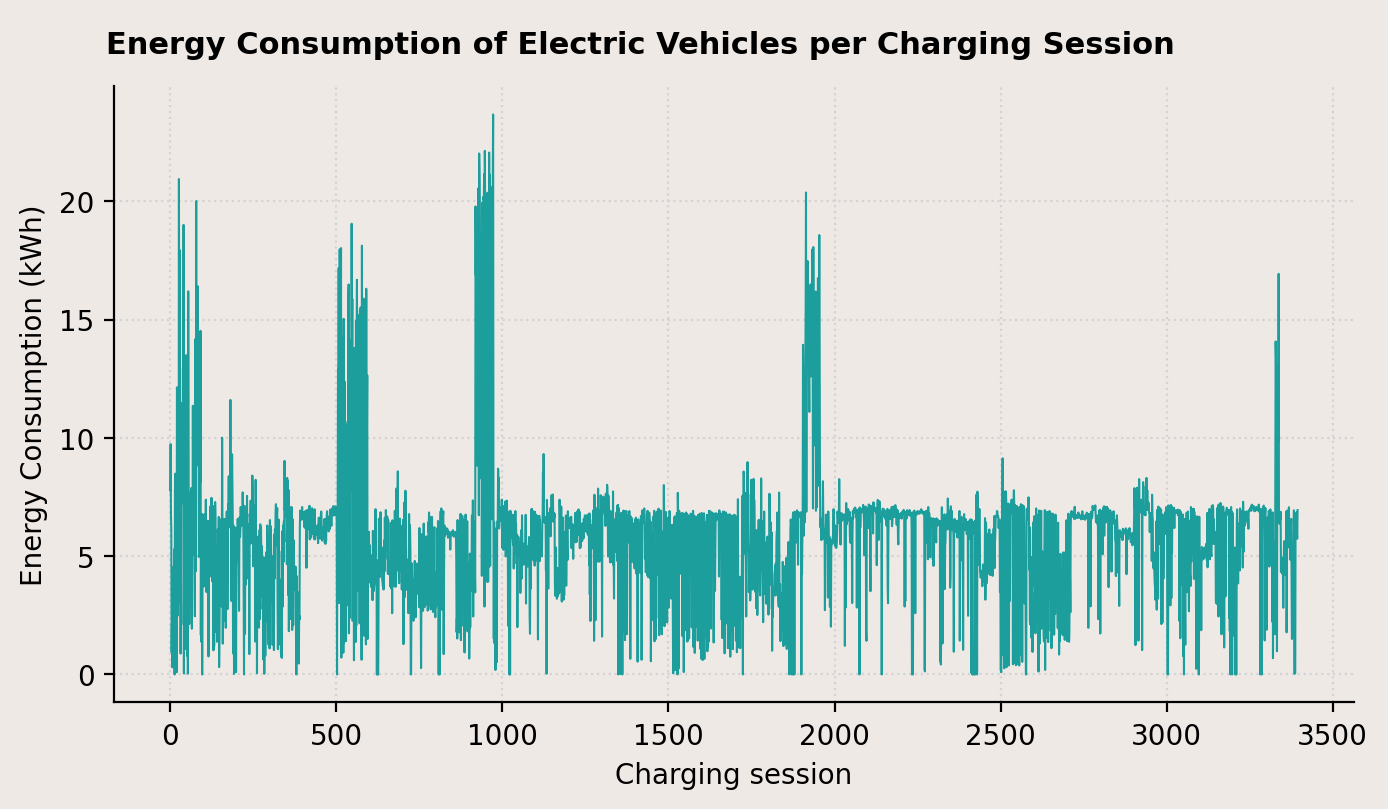

In [134]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls=":")

ax.plot(df["kwhTotal"], color = "#109A99", alpha = 0.95, lw = 0.75)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_xlabel("Charging session", fontsize=10)
ax.set_ylabel("Energy Consumption (kWh)", fontsize=10)

fig_text(x =0.12, y=0.95,
             s="Energy Consumption of Electric Vehicles per Charging Session",
             weight="bold",
             size=11)

plt.show()

#### We observe that energy consumption fluctuates within the range of 5 to 7 kWh, with several peaks occurring between 15 and 20 kWh.

### Charging Time for Electric Vehicles

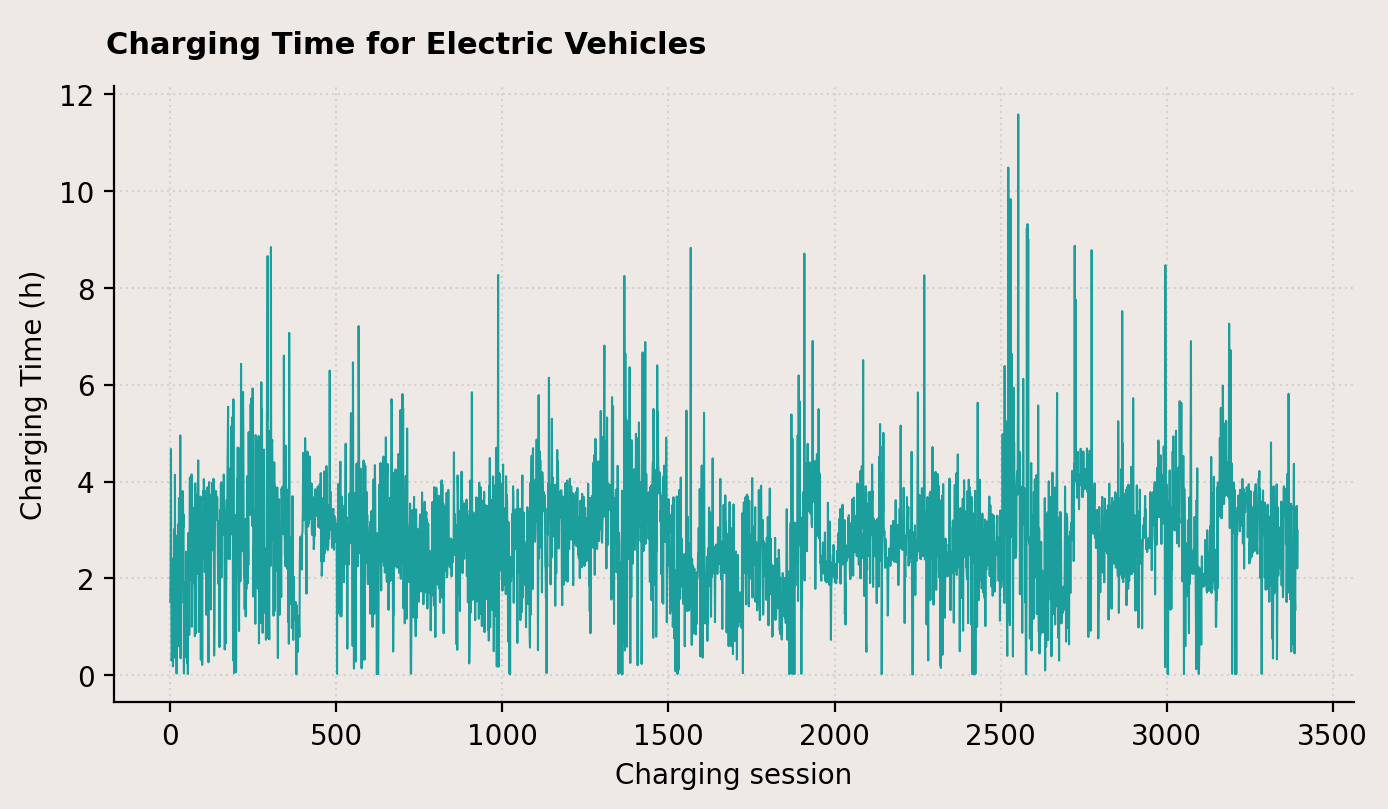

In [135]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls=":")
ax.plot(df["chargeTimeHrs"], color = "#109A99", alpha = 0.95, lw = 0.75)

ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_xlabel("Charging session", fontsize=10)
ax.set_ylabel("Charging Time (h)", fontsize=10)

fig_text(x =0.12, y=0.95,
             s="Charging Time for Electric Vehicles",
             weight="bold",
             size=11)

plt.show()

#### We note that the charging time varies between 2 to 4 hours, with multiple instances of peaks exceeding 8 hours.

### Organizing the data for analysis based on the day of the week.

In [21]:
df_by_day_total = df.groupby('weekday')[['kwhTotal','dollars','chargeTimeHrs','distance']].sum().reset_index()
df_by_day_total

,weekday,kwhTotal,dollars,chargeTimeHrs,distance
0,Fri,3521.31,65.15,1685.592500,7506.022958
1,Mon,3423.59,71.81,1730.608056,7965.723493
2,Sat,394.69,1.00,142.442778,1216.977723
3,Sun,183.18,0.00,50.409444,157.383221
4,Thu,4235.13,74.07,2050.110278,9330.331564
5,Tue,3811.89,67.84,1838.203611,8118.343061
6,Wed,4149.80,120.82,2094.245833,9165.259139


In [22]:
df_by_day_avg = df.groupby('weekday')[['kwhTotal','dollars','chargeTimeHrs','distance']].mean().reset_index()
df_by_day_avg

,weekday,kwhTotal,dollars,chargeTimeHrs,distance
0,Fri,5.772639,0.106803,2.763266,18.307373
1,Mon,5.566813,0.116764,2.813997,18.876122
2,Sat,6.365968,0.016129,2.297464,22.961844
3,Sun,7.632500,0.000000,2.100394,10.492215
4,Thu,5.762082,0.100776,2.789266,18.623416
5,Tue,6.002976,0.106835,2.894809,18.620053
6,Wed,5.820196,0.169453,2.937231,18.590789


In [23]:
days_in_week = ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
daysIndex = dict(zip(days_in_week,np.arange(len(days_in_week))))
df_by_day_total["weekday_id"] = df_by_day_total["weekday"].map(daysIndex)
df_by_day_total = df_by_day_total.sort_values(by="weekday_id")

In [24]:
df_by_day_total

,weekday,kwhTotal,dollars,chargeTimeHrs,distance,weekday_id
1,Mon,3423.59,71.81,1730.608056,7965.723493,0
5,Tue,3811.89,67.84,1838.203611,8118.343061,1
6,Wed,4149.80,120.82,2094.245833,9165.259139,2
4,Thu,4235.13,74.07,2050.110278,9330.331564,3
0,Fri,3521.31,65.15,1685.592500,7506.022958,4
2,Sat,394.69,1.00,142.442778,1216.977723,5
3,Sun,183.18,0.00,50.409444,157.383221,6


In [25]:
days_in_week = ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
daysIndex = dict(zip(days_in_week,np.arange(len(days_in_week))))
df_by_day_avg["weekday_id"] = df_by_day_avg["weekday"].map(daysIndex)
df_by_day_avg = df_by_day_avg.sort_values(by="weekday_id")

In [26]:
df_by_day_avg

,weekday,kwhTotal,dollars,chargeTimeHrs,distance,weekday_id
1,Mon,5.566813,0.116764,2.813997,18.876122,0
5,Tue,6.002976,0.106835,2.894809,18.620053,1
6,Wed,5.820196,0.169453,2.937231,18.590789,2
4,Thu,5.762082,0.100776,2.789266,18.623416,3
0,Fri,5.772639,0.106803,2.763266,18.307373,4
2,Sat,6.365968,0.016129,2.297464,22.961844,5
3,Sun,7.632500,0.000000,2.100394,10.492215,6


### Total Charging Time by Day of Week

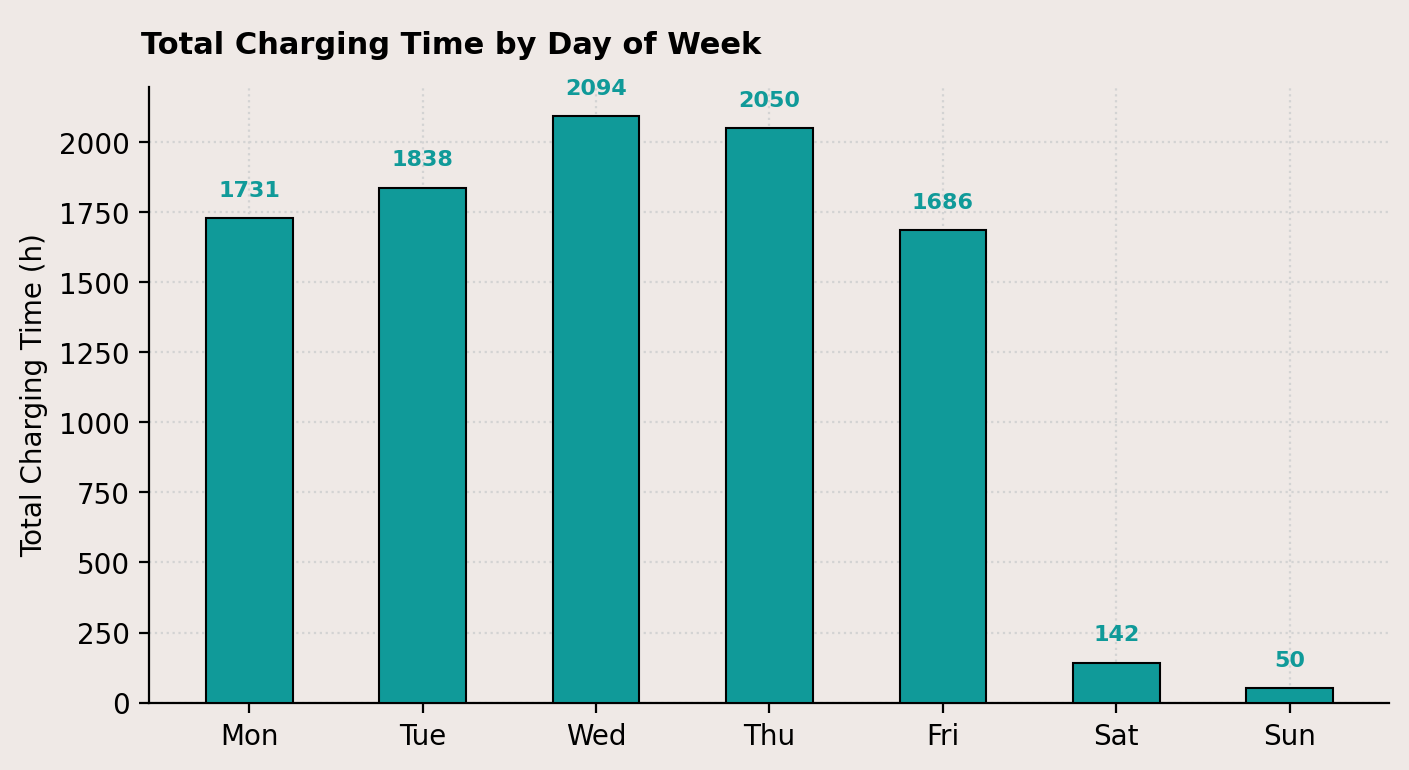

In [138]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls=":")

ax.bar(df_by_day_total["weekday"],
       df_by_day_total["chargeTimeHrs"],
       ec = "black",
       lw = 0.75,
       zorder = 3,
       width=0.5,
       color = "#109A99")


for index, y in enumerate(df_by_day_total["chargeTimeHrs"]):
    ax.annotate(
        xy= (index, y),
        text= f"{y:.0f}",
        xytext = (0,10),
        textcoords= "offset points",
        size = 8,
        color = "#109A99",
        ha = "center",
        va = "center",
        weight = "bold"

    )

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_ylabel("Total Charging Time (h)",fontsize=10)

fig_text(
    x = 0.12, y=0.95,
    s ="Total Charging Time by Day of Week",
    weight = "bold",
    size = 11
)

plt.show()

#### The peak charging activity is observed on Wednesdays and Thursdays, while the lowest activity occurs during the weekend.

### Average Charging Time by Day of Week

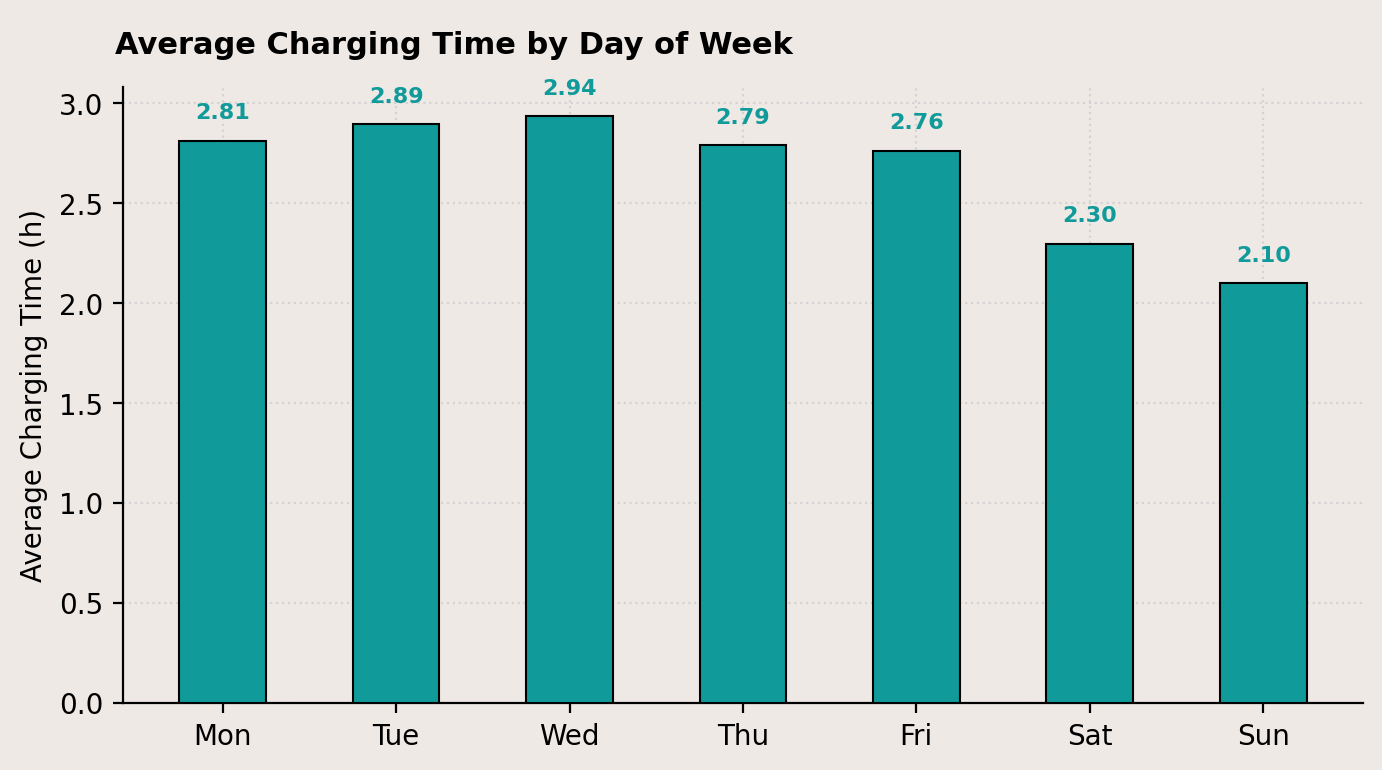

In [139]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls=":")

ax.bar(df_by_day_avg["weekday"],
       df_by_day_avg["chargeTimeHrs"],
       ec = "black",
       lw = 0.75,
       zorder = 3,
       width=0.5,
       color = "#109A99")


for index, y in enumerate(df_by_day_avg["chargeTimeHrs"]):
    ax.annotate(
        xy= (index, y),
        text= f"{y:.2f}",
        xytext = (0,10),
        textcoords= "offset points",
        size = 8,
        color = "#109A99",
        ha = "center",
        va = "center",
        weight = "bold"

    )

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_ylabel("Average Charging Time (h)",fontsize=10)

fig_text(
    x = 0.12, y=0.95,
    s ="Average Charging Time by Day of Week",
    weight = "bold",
    size = 11
)

plt.show()

#### On weekdays, the average charging time ranges from 2.76 hours on Fridays to 2.94 hours on Wednesdays, whereas during the weekend, it decreases to 2.1 hours.

### Energy Consumption vs. Charging Time

In [29]:
np.array(df["dollars"])

array([0.  , 0.  , 0.58, ..., 0.  , 0.  , 0.  ])

In [30]:
df_energy = df.loc[:,["chargeTimeHrs","kwhTotal","dollars"]].sort_values(by="dollars").reset_index(drop=True)
df_energy

,chargeTimeHrs,kwhTotal,dollars
0,1.510556,7.78,0.00
1,2.256389,6.57,0.00
2,2.526111,6.73,0.00
3,3.089444,6.95,0.00
4,2.397500,6.80,0.00
...,...,...,...
3389,9.320278,6.56,5.33
3390,6.602778,6.47,5.75
3391,9.836944,7.00,5.75
3392,10.488333,7.23,6.42


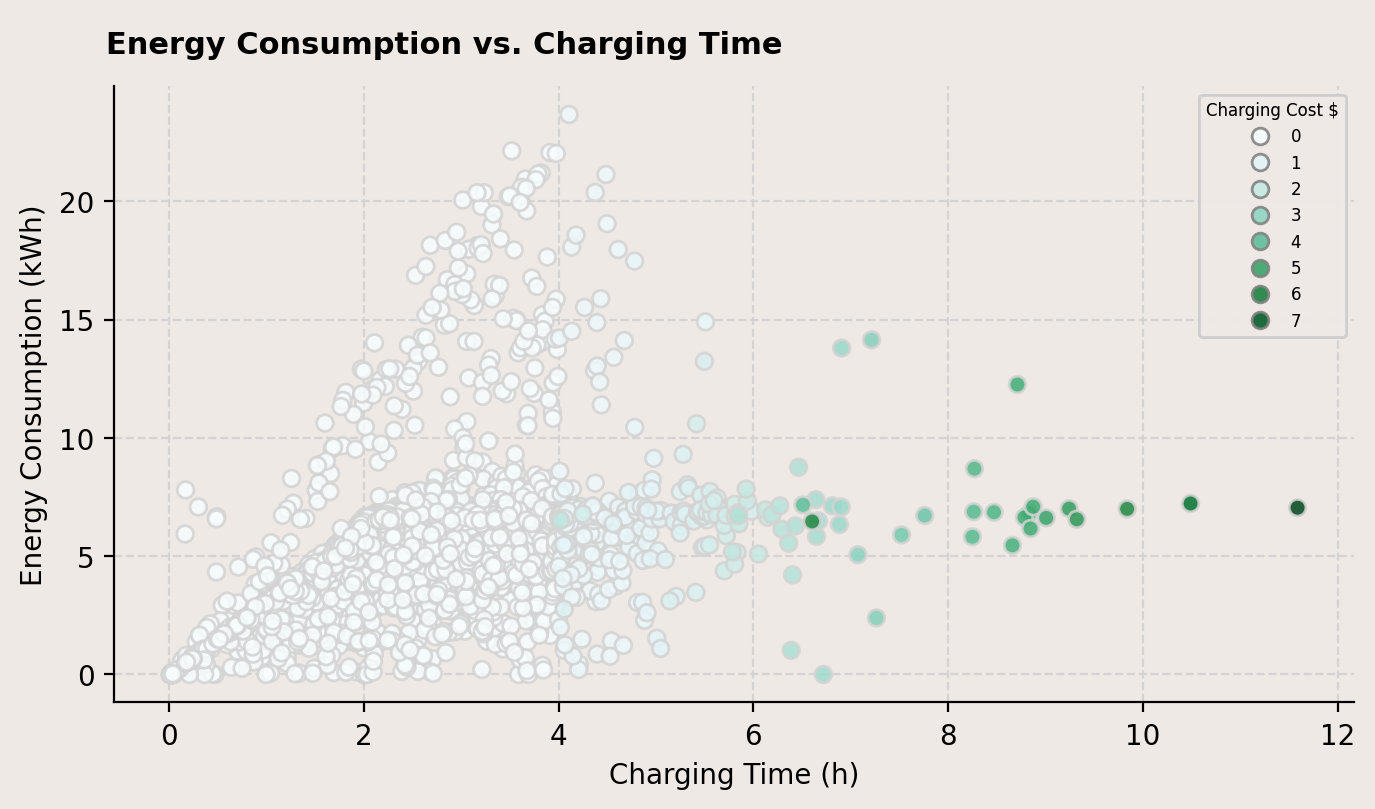

In [169]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls= "--")
ax.set_xlabel("Charging Time (h)")
ax.set_ylabel("Energy Consumption (kWh)")

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

scatter = ax.scatter(df_energy["chargeTimeHrs"],
           df_energy["kwhTotal"],
           c=df_energy["dollars"],
           cmap="BuGn",
           ec="lightgrey",
           zorder=3,
           alpha=0.85)

fig_text(
    x=0.12, y=0.95,
    s = "Energy Consumption vs. Charging Time",
    weight="bold",
    size=11
)


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right",prop = {'size':6} ,title="Charging Cost $")
legend1.get_frame().set_facecolor("#EFE9E6")
legend1.get_title().set_fontsize('6')

ax.add_artist(legend1)

for handle in legend1.legendHandles:
    handle.set_markeredgecolor('grey')


plt.show()

#### We can conclude that most charging sessions last up to 4 hours when charging is free. Beyond the 4-hour mark, drivers are required to pay for the charging service.

### Charging Cost vs. Charging Time

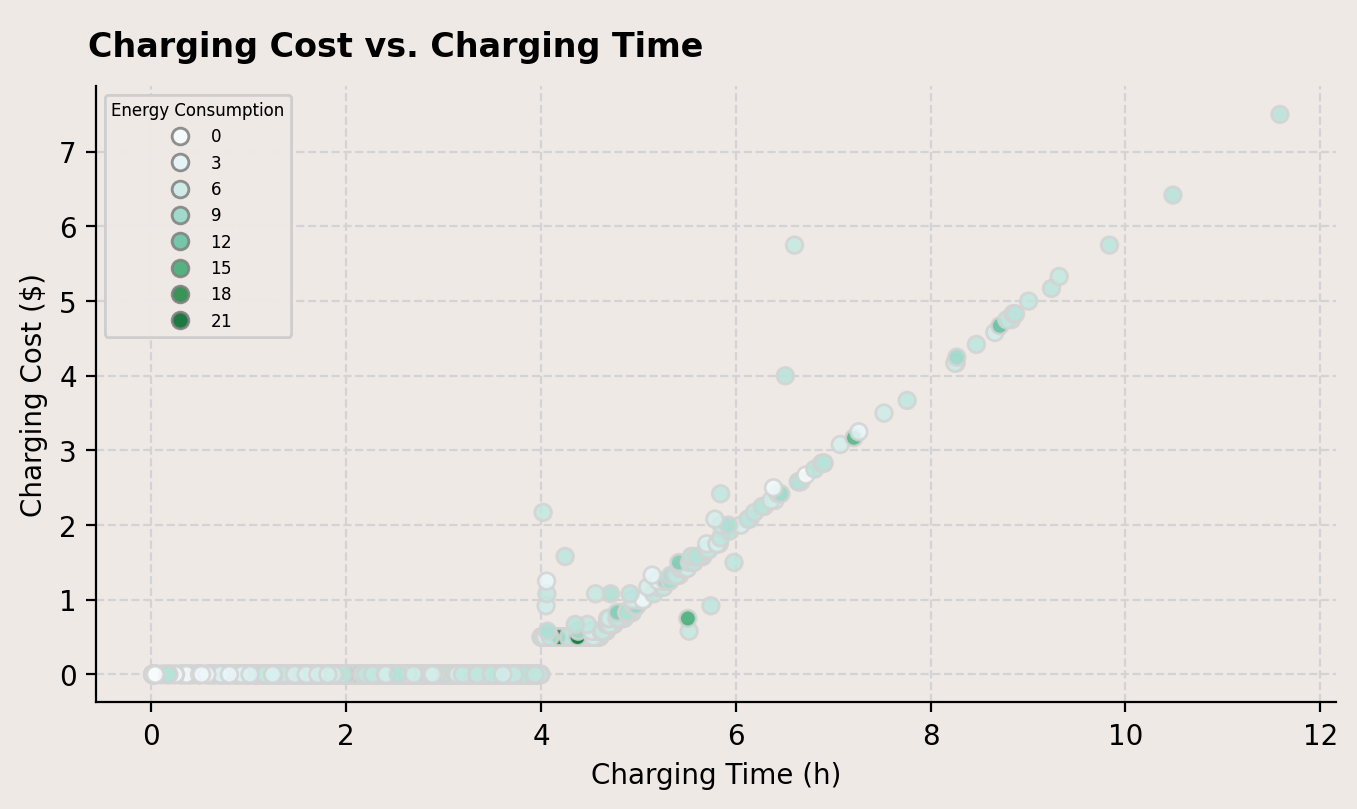

In [141]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls= "--")
ax.set_xlabel("Charging Time (h)")
ax.set_ylabel("Charging Cost ($)")

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

scatter = ax.scatter(df_energy["chargeTimeHrs"],
           df_energy["dollars"],
           c=df_energy["kwhTotal"],
           #s=s,
           cmap="BuGn",
           ec="lightgrey",
           zorder=3,
           alpha=0.85)

fig_text(
    x=0.12, y=0.95,
    s = "Charging Cost vs. Charging Time",
    weight="bold",
    size=12
)


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", prop = {"size":6}, title="Energy Consumption")
legend1.get_frame().set_facecolor("#EFE9E6")
legend1.get_title().set_fontsize('6')

ax.add_artist(legend1)


for handle in legend1.legendHandles:
    handle.set_markeredgecolor('grey')

plt.show()

#### The graph above confirms that charging is free for sessions lasting below 4 hours. Beyond this threshold, there is a positive correlation between charging time and cost, indicating that longer charging durations result in higher costs.

### Calculating the unit cost of 1 kWh

In [143]:
df_filtered = df.loc[:,["kwhTotal","dollars","facilityType","weekday"]]

In [144]:
df_filtered = df_filtered.assign(unit_cost = lambda x: np.round(x["dollars"]/x["kwhTotal"],2))

In [145]:
df_filtered.head()

,kwhTotal,dollars,facilityType,weekday,unit_cost
0,7.78,0.00,3,Tue,0.00
1,9.74,0.00,3,Wed,0.00
2,6.76,0.58,3,Fri,0.09
3,6.17,0.00,3,Wed,0.00
4,0.93,0.00,3,Thu,0.00


### Mapping facility type

In [146]:
facility_mapper = {1:"manufacturing", 2:"office", 3:"research and development", 4:"other"}

In [147]:
df_filtered["facilityType"] = df_filtered["facilityType"].map(facility_mapper)

In [148]:
df_filtered.head()

,kwhTotal,dollars,facilityType,weekday,unit_cost
0,7.78,0.00,research and development,Tue,0.00
1,9.74,0.00,research and development,Wed,0.00
2,6.76,0.58,research and development,Fri,0.09
3,6.17,0.00,research and development,Wed,0.00
4,0.93,0.00,research and development,Thu,0.00


In [149]:
df_filtered.describe()

,kwhTotal,dollars,unit_cost
count,3394.000000,3394.000000,3340.0
mean,5.810133,0.118058,inf
std,2.893005,0.492483,NaN
min,0.000000,0.000000,0.0
25%,4.350000,0.000000,0.0
50%,6.230000,0.000000,0.0
75%,6.830000,0.000000,0.0
max,23.680000,7.500000,inf


### Filtering rows where unit_cost is different than infinite

In [150]:
df_filtered = df_filtered.loc[df_filtered["unit_cost"] < np.inf]

In [151]:
weekday_unit_cost = df_filtered.groupby("weekday")[["unit_cost"]].mean().reset_index()
days_in_week = ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
daysIndex = dict(zip(days_in_week,np.arange(len(days_in_week))))
weekday_unit_cost["weekday_id"] = weekday_unit_cost["weekday"].map(daysIndex)
weekday_unit_cost = weekday_unit_cost.sort_values(by="weekday_id")
weekday_unit_cost.rename(columns={"unit_cost": "avg_unit_cost"},inplace=True)

In [152]:
weekday_unit_cost

,weekday,avg_unit_cost,weekday_id
1,Mon,0.022130,0
5,Tue,0.017528,1
6,Wed,0.030484,2
4,Thu,0.019667,3
0,Fri,0.021555,4
2,Sat,0.002459,5
3,Sun,0.000000,6


### Average Charging Unit Cost by Day of Week

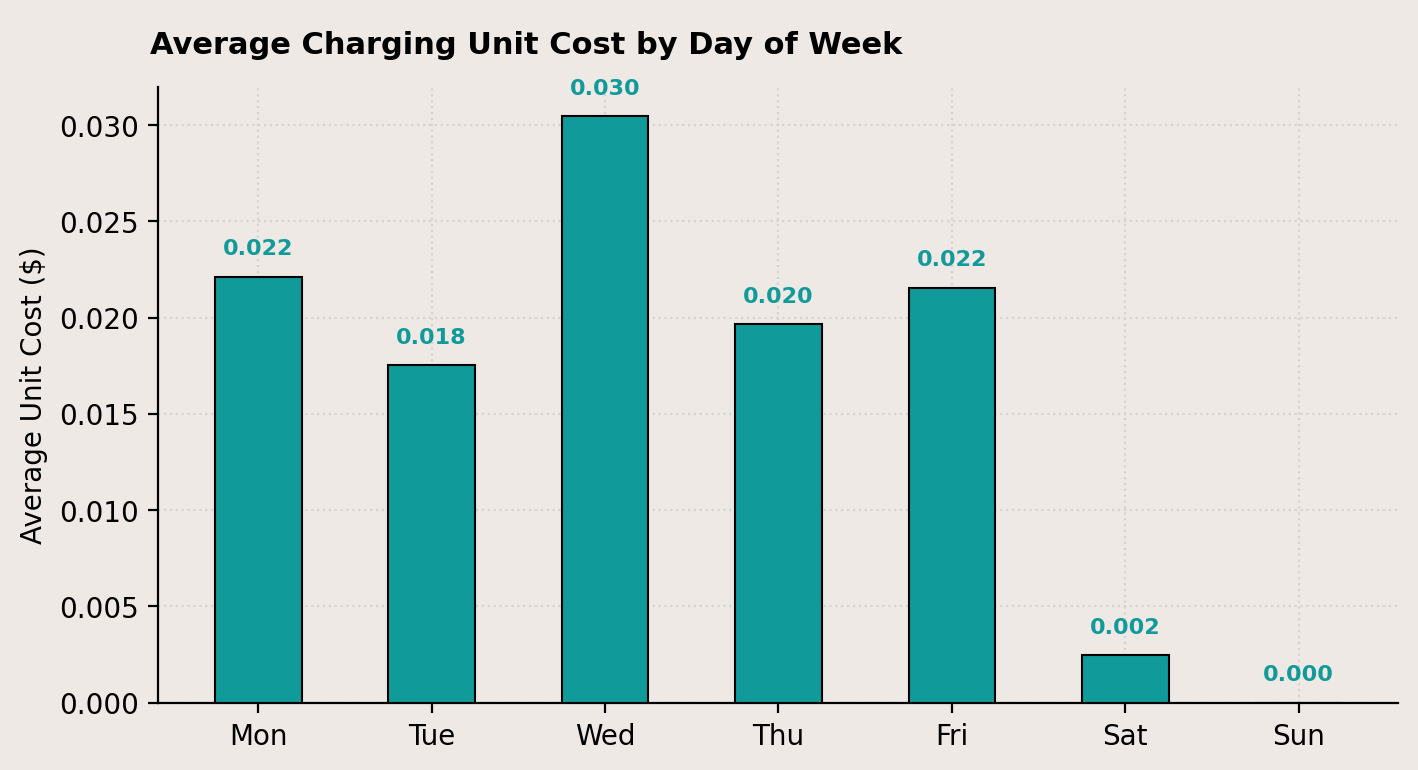

In [153]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls=":")

ax.bar(weekday_unit_cost["weekday"],
       weekday_unit_cost["avg_unit_cost"],
       ec = "black",
       lw = 0.75,
       zorder = 3,
       width=0.5,
       color = "#109A99")


for index, y in enumerate(weekday_unit_cost["avg_unit_cost"]):
    ax.annotate(
        xy= (index, y),
        text= f"{y:.3f}",
        xytext = (0,10),
        textcoords= "offset points",
        size = 8,
        color = "#109A99",
        ha = "center",
        va = "center",
        weight = "bold"

    )

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_ylabel("Average Unit Cost ($)", fontsize=10)

fig_text(
    x = 0.12, y=0.95,
    s ="Average Charging Unit Cost by Day of Week",
    weight = "bold",
    size = 11
)

plt.show()

#### We can assert that Wednesdays witness the highest charging costs, while the cheapest charging is available on weekends, with Sundays offering free charging.

### Calculating no of charging session by facility type and average unit cost by facility type

In [154]:
facility_type_stats = df_filtered.groupby("facilityType").agg(no_of_charging_sessions=("facilityType","count"), avg_unit_cost=("unit_cost","mean")).reset_index()
facility_type_stats

,facilityType,no_of_charging_sessions,avg_unit_cost
0,manufacturing,589,0.005433
1,office,843,0.026726
2,other,106,0.055094
3,research and development,1801,0.023009


### No of charging sessions by facility type

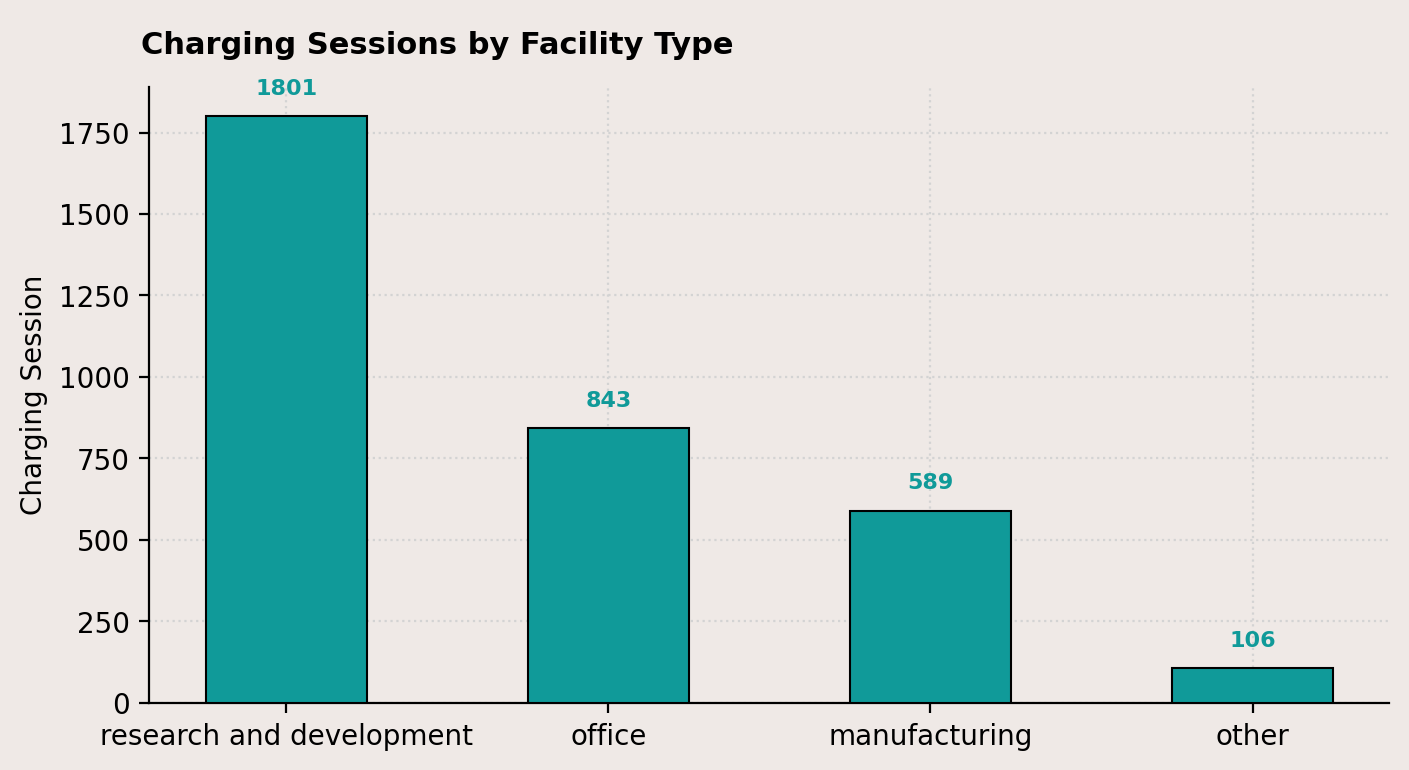

In [155]:
facility_type_charging_events = facility_type_stats.sort_values(by="no_of_charging_sessions",ascending=False)

fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls=":")

ax.bar(facility_type_charging_events["facilityType"],
       facility_type_charging_events["no_of_charging_sessions"],
       ec = "black",
       lw = 0.75,
       zorder = 3,
       width=0.5,
       color = "#109A99")


for index, y in enumerate(facility_type_charging_events["no_of_charging_sessions"]):
    ax.annotate(
        xy= (index, y),
        text= f"{y:.0f}",
        xytext = (0,10),
        textcoords= "offset points",
        size = 8,
        color = "#109A99",
        ha = "center",
        va = "center",
        weight = "bold"

    )

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_ylabel("Charging Session", fontsize=10)

fig_text(
    x = 0.12, y=0.95,
    s ="Charging Sessions by Facility Type",
    weight = "bold",
    size = 11
)

plt.show()

#### We can conclude that research and development facilities experience the highest number of charging sessions.

### Charging Unit Cost by Facility Type

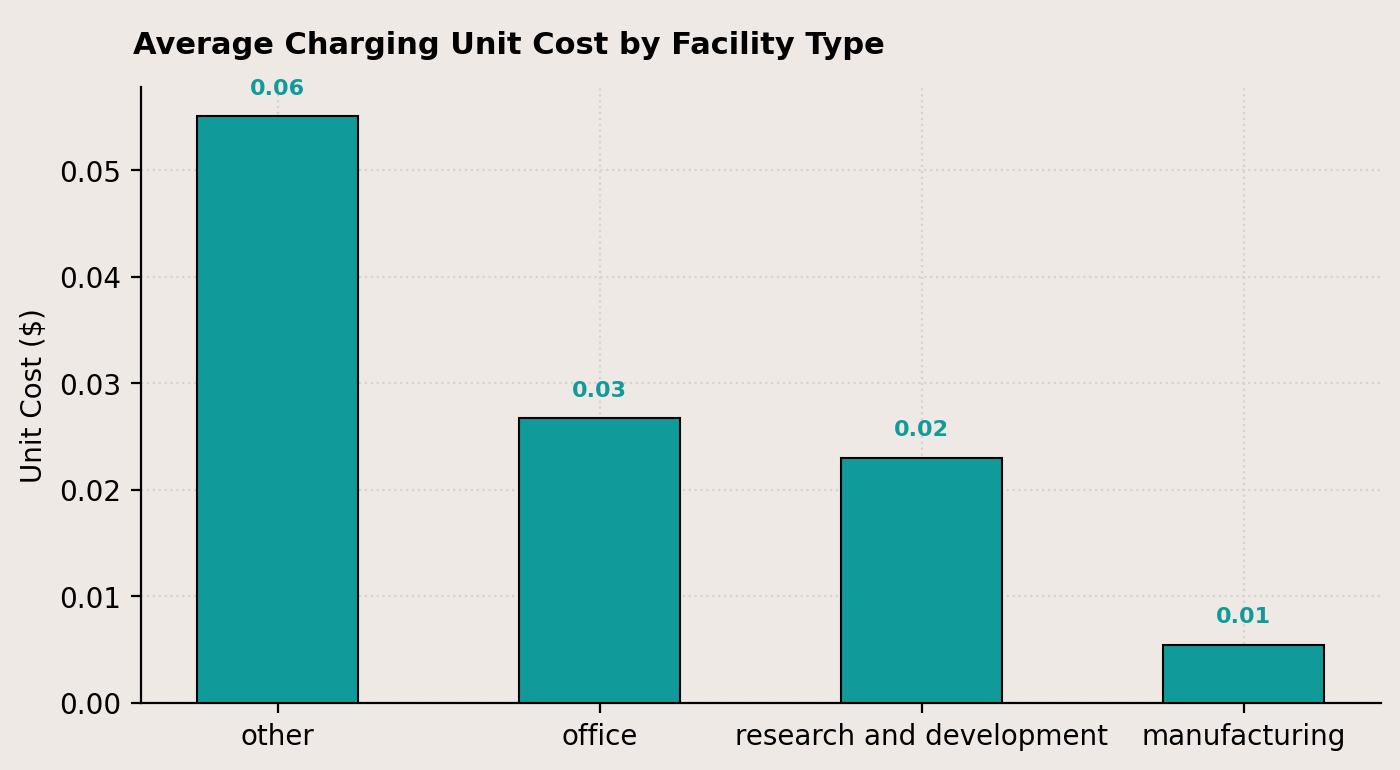

In [156]:
facility_type_unit_cost = facility_type_stats.sort_values(by="avg_unit_cost",ascending=False)

fig, ax = plt.subplots(figsize=(8,4), dpi=200, facecolor="#EFE9E6")
ax.set_facecolor("#EFE9E6")

# Add spines
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

# Add grid and axis labels
ax.grid(True, color="lightgrey", ls=":")

ax.bar(facility_type_unit_cost["facilityType"],
       facility_type_unit_cost["avg_unit_cost"],
       ec = "black",
       lw = 0.75,
       zorder = 3,
       width=0.5,
       color = "#109A99")


for index, y in enumerate(facility_type_unit_cost["avg_unit_cost"]):
    ax.annotate(
        xy= (index, y),
        text= f"{y:.2f}",
        xytext = (0,10),
        textcoords= "offset points",
        size = 8,
        color = "#109A99",
        ha = "center",
        va = "center",
        weight = "bold"

    )

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.set_ylabel("Unit Cost ($)", fontsize=10)

fig_text(
    x = 0.12, y=0.95,
    s ="Average Charging Unit Cost by Facility Type",
    weight = "bold",
    size = 11
)

plt.show()

#### We can assert that manufacturing facility types incur the lowest charging costs, whereas facilities categorized as "other" experience the highest charging costs.